In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Bước 1: Các bạn hãy chọn 1 trong số các file .npy mà các bạn vừa tải về ở trên, và thay đổi đường dẫn tương ứng phía dưới
file_path = "./quickdraw_dataset/full_numpy_bitmap_airplane.npy"  # <= Các bạn thay từ bicycle bằng tên tương ứng của category các bạn chọn nhé
images = np.load(file_path).astype(np.float32)  # Load toàn bộ các ảnh của category này vào biến images
print(images.shape)
train_images = images[:-10]  # Lấy tất cả ảnh, ngoại trừ 10 ảnh cuối ra làm bộ training.
test_images = images[-10:]  # Giữ 10 ảnh cuối làm bộ test

(151623, 784)


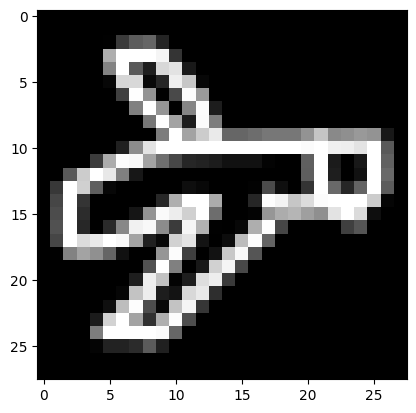

In [5]:
# Chọn một hình ảnh (ví dụ hình đầu tiên)
example_image = images[0].reshape(28, 28)

# Hiển thị hình
plt.imshow(example_image, cmap='gray')
plt.show()

In [3]:
#TODO Bước 2: Các bạn hãy tính ra 1 bức ảnh trung bình của bộ training. Bức ảnh này sẽ có kích thước 28x28 pixel (hint: 784=28*28)

# Tính giá trị trung bình của mỗi pixel across tất cả ảnh training
avg_image_flat = np.mean(train_images, axis=0)

# Reshape về kích thước 28x28
avg_image = avg_image_flat.reshape(28, 28)

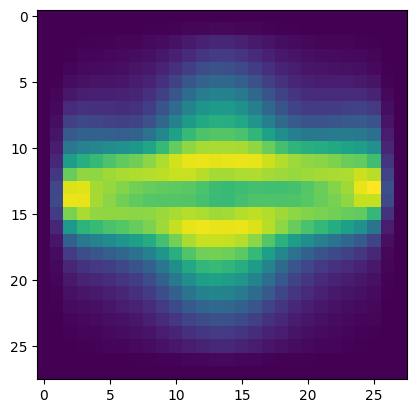

In [8]:
# Bước 3: Các bạn sẽ visualize bức ảnh trung bình các bạn vửa tính được ở bước 2 bằng 2 dòng sau. Các bạn thử
# xem các bạn có nhận ra được category mà các bạn chọn bằng cách nhìn vào bức ảnh trung bình này không nhé
plt.imshow(avg_image)
plt.show()

In [15]:
# Bước 4: Các bạn chọn 1 index bất kì từ 0 đến 9. Ví dụ mình chọn index = 4
# Sau đó các bạn hãy tính tích vô hướng (dot product) của bức ảnh test này với bức ảnh trung bình các bạn tính được ở trên
index = 4  # Các bạn có thể thay đổi index tùy ý
test_image = test_images[index]
#TODO Các bạn tính tích vô hướng (dot product) của bức ảnh test và ảnh trung bình ở dòng dưới đây
# (các bạn có thể code trên nhiều hơn 1 dòng)

# Trước khi tính tích vô hướng, chúng ta cần flatten ảnh trung bình 
# vì ảnh test đang ở dạng flatten (784,)
avg_image_flat = avg_image.flatten()

# Tính tích vô hướng
score = np.dot(test_image, avg_image_flat)
print(f"Tích vô hướng của ảnh test {index} với ảnh trung bình: {score}")


Tích vô hướng của ảnh test 4 với ảnh trung bình: 3916402.0


In [19]:
# Bước 5: Các bạn hãy lặp lại bước 1 đến 3 cho tất cả các categories còn lại (chú ý tại bước 1 các bạn không cần phân
# ra train với test images nữa nhé, coi như là dùng tất cả cho train). Sau đó các bạn hãy tính tích vô hướng của từng ảnh
# trung bình của ảnh test các bạn chọn ở bước 4 với từng bức ảnh trung bình này.
#
# Cuối cùng các bạn xem là liệu trong 10 score này, score tương ứng với tích vô hướng của ảnh test này với
# ảnh trung bình của category của chính nó có phải là score lớn nhất không nhé. Các bức ảnh trung bình mà các bạn tính ra
# có thể xem như là weight cho từng category mà các bạn vừa học ở bài 1 (tất nhiên là weight của mô hình sau khi đã
# train xong)

# Danh sách các categories
categories = ['airplane', 'apple', 'basketball', 'book', 'bucket', 
              'crab', 'duck', 'flower', 'umbrella', 'wine bottle']

# Tính ảnh trung bình cho mỗi category và lưu scores
scores = []
for category in categories:
    file_name = f"full_numpy_bitmap_{category}.npy"
    
    # Load ảnh và tính trung bình
    category_images = np.load(f"./quickdraw_dataset/{file_name}").astype(np.float32)
    category_avg = np.mean(category_images, axis=0)
    
    # Tính tích vô hướng với ảnh test
    score = np.dot(test_image, category_avg)
    scores.append(score)
    print(f"Score với {category}: {score}")

# Tìm category có score cao nhất
predicted_category = categories[np.argmax(scores)]
print(f"\nCategory dự đoán: {predicted_category}")
print(f"Category thực tế: airplane")  # Vì ảnh test của chúng ta là từ category airplane

Score với airplane: 3916437.5
Score với apple: 1730323.75
Score với basketball: 3620661.0
Score với book: 2873451.0
Score với bucket: 2519169.0
Score với crab: 3881314.25
Score với duck: 2858561.0
Score với flower: 2815039.0
Score với umbrella: 2260865.5
Score với wine bottle: 1731571.5

Category dự đoán: airplane
Category thực tế: airplane


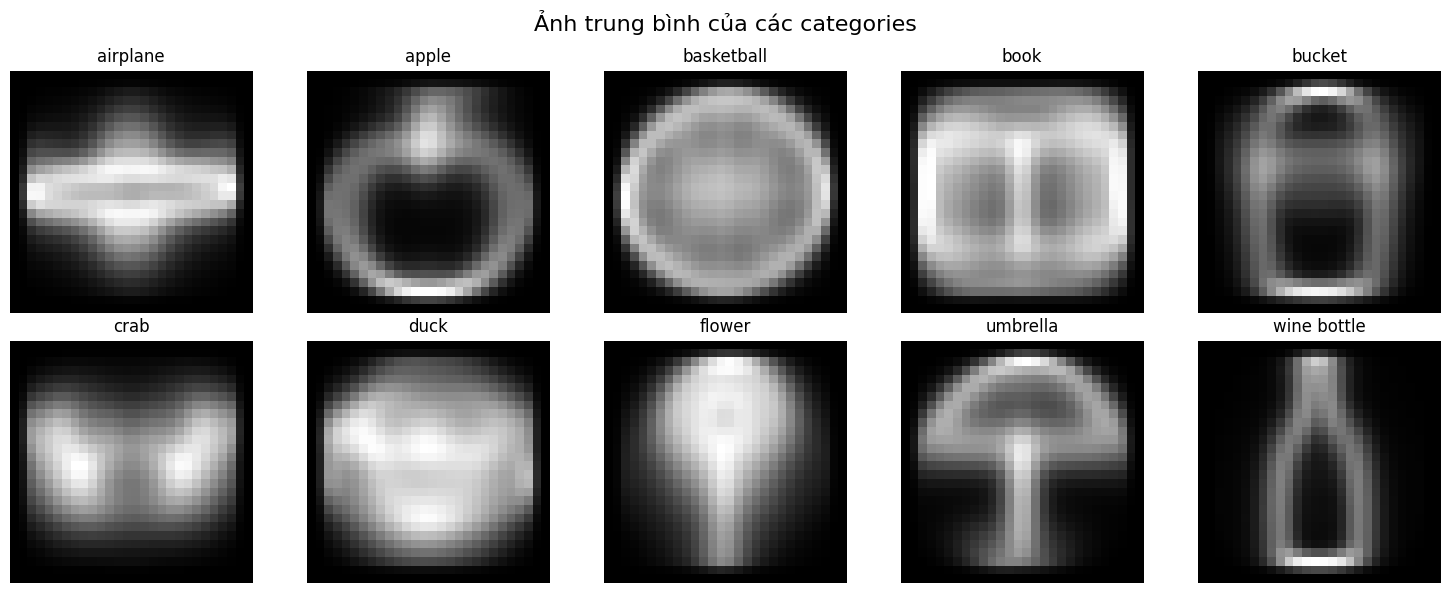

In [20]:
# Bước 6 (optional): Các bạn thử visualize 10 weight (avg_image) này trong cùng 1 ảnh kích thước 2x5 hoặc 5x2 để so sánh xem,
# weight của các categories nào dễ nhìn và weight nào không nhé

# Tạo danh sách lưu các ảnh trung bình
avg_images = []
categories = ['airplane', 'apple', 'basketball', 'book', 'bucket', 
              'crab', 'duck', 'flower', 'umbrella', 'wine bottle']

# Tính ảnh trung bình cho mỗi category
for category in categories:
    file_name = f"full_numpy_bitmap_{category}.npy"
    images = np.load(f"./quickdraw_dataset/{file_name}").astype(np.float32)
    avg_img = np.mean(images, axis=0).reshape(28, 28)
    avg_images.append(avg_img)

# Tạo subplot 2x5
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Ảnh trung bình của các categories', fontsize=16)

# Hiển thị từng ảnh trung bình
for idx, (ax, category) in enumerate(zip(axes.flat, categories)):
    ax.imshow(avg_images[idx], cmap='gray')
    ax.set_title(category)
    ax.axis('off')

plt.tight_layout()
plt.show()